# Step1 : Importing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
tweets_df = pd.read_csv('twitter.csv')

In [3]:
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
tweets_df=tweets_df.drop(['id'],axis=1)

# Step2: Explore dataset

In [5]:
tweets_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [6]:
tweets_df.isnull().sum()

label    0
tweet    0
dtype: int64

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

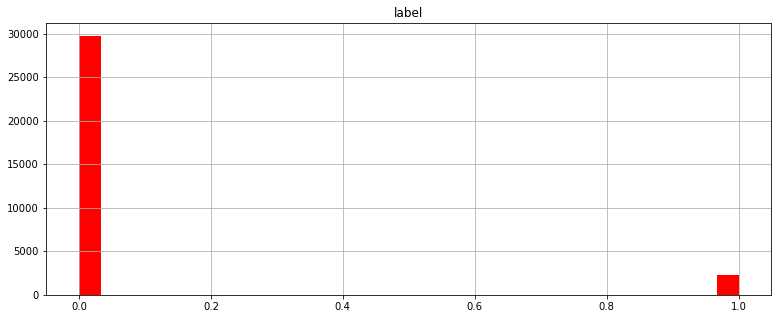

In [7]:
tweets_df.hist(bins=30,figsize=(13,5),color='r')

In [8]:
tweets_df['length'] = tweets_df['tweet'].apply(len)

<AxesSubplot:ylabel='Frequency'>

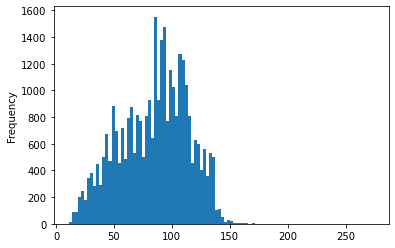

In [9]:
tweets_df.length.plot(bins=100,kind='hist')

In [10]:
#Create two data frames - positive and Negative
positive = tweets_df[tweets_df['label']==0]
negative = tweets_df[tweets_df['label']==1]

In [11]:
#!pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [12]:
#Grab all info in one string, plot the word cloud

In [13]:
sentence = tweets_df['tweet'].tolist()

In [14]:
len(sentence)

31962

In [15]:
sentence_as_one_string= " ".join(sentence)

In [16]:
!pip3 install WordCloud

Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [17]:
negative_list= negative['tweet'].tolist()

In [18]:
negative_sentence_as_one_string = " ".join(negative_list)

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
#Remove all the punctuations

In [21]:
import nltk

In [22]:
#nltk.download('stopwords')

In [23]:
#Common words
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Step3: Cleaning and preparation

In [24]:
def message_cleaning(message):
    punch_removed = [char for char in message if char not in string.punctuation]
    removed_join = ''.join(punch_removed)
    remove_join_clean = [word for word in removed_join.split() if word.lower() not in stopwords.words('english')]
    return remove_join_clean

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
#vectorizer = CountVectorizer(analyzer = message_cleaning)
#Defining cleaning pipeline
tweets_countterVectorize = CountVectorizer(analyzer = message_cleaning, dtype='uint8').fit_transform(tweets_df['tweet']).toarray()

In [27]:
X = tweets_countterVectorize

In [28]:
y = tweets_df['label']

# Step4: Model

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
from sklearn.naive_bayes import MultinomialNB


In [35]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()